# Q-learning logic from scratch
Source is [this article](https://towardsdatascience.com/q-learning-for-beginners-2837b777741)

- Q-learning is a model-free reinforcement learning algorithm used to learn action-values for each state in the system
- We'll build up to this algorithm from scratch to build intuition

- We'll be learning this within the context of the Frozen Lake environment available in [`openai/gym`](https://github.com/openai/gym)

    - This is a reskinned version of the Gridworld example discussed in David Silver's lectures
    - *States*: Tiles on the map, holes are terminal states (game ends with 0 reward), the prize is the goal
    - *Actions*: From each state, you have 4 possible actions (up, down, left, right)
    - *Reward*: +1 when you reach the prize, no reward for moving tiles nor for entering a hole
    - [Full documentation here](https://www.gymlibrary.dev/environments/toy_text/frozen_lake/)

<center><img src="image.png"/></center>

In [1]:
!source bin/activate > /dev/null # This suppresses cell output by redirecting it
%pip install -r requirements.txt > /dev/null

You should consider upgrading via the '/Users/darrenwong/Documents/Projects/rl-learning/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [21]:
import gym
import random
import time
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate env, reset it, then render it
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi") # can do render_mode="human" for a pretty print, but will crash
state = env.reset()

print(env.render())


SFFF
FHFH
FFFH
HFFG



## Q-table

In [4]:
# Our table has the following dimensions:
# (rows x columns) = (states x actions) = (16 x 4)

# Alternatively, the gym library can also directly 
# give us the number of states and actions using 
# "env.observation_space.n" and "env.action_space.n"
nb_states = env.observation_space.n  # = 16
nb_actions = env.action_space.n      # = 4
qtable = np.zeros((nb_states, nb_actions))

qtable

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
# ◀️ LEFT = 0
# 🔽 DOWN = 1
# ▶️ RIGHT = 2
# 🔼 UP = 3

# Can either use `random` to sample actions, but the environment provides us a 
# convenient method to do this 
env.action_space.sample()

2

In [6]:
# Illustrate how we can move the agent
env.step(2) # to the right
print(env.render())
env.reset()

  (Right)
SFFF
FHFH
FFFH
HFFG



/Users/darrenwong/Documents/Projects/rl-learning/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(0, {'prob': 1})

In [10]:
# Moving the agent randomly
action = env.action_space.sample()

# Implement this action and move the agent in the desired direction
new_state, reward, done, info, _ = env.step(action)

# Display the results (reward and map)
print(env.render())
print(f'Reward = {reward}')
env.reset()

  (Right)
SFFF
FHFH
FFFH
HFFG

Reward = 0.0


(0, {'prob': 1})

In [11]:
# We re-initialize the Q-table
qtable = np.zeros((env.observation_space.n, env.action_space.n))

print('Q-table before training:')
print(qtable)

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [12]:
# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor

# List of outcomes to plot
outcomes = []

# Training
for _ in range(episodes):
    reset_obj = env.reset()
    state = reset_obj[0]
    done = False

    # By default, we consider our outcome to be a failure
    # outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = env.action_space.sample()
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = env.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

    # If we have a reward, it means that our outcome is a success
    if reward:
        outcomes.append('Success')
    else:
        outcomes.append('Failure')

In [13]:
print()
print('===========================================')
print('Q-table after training:')
print(qtable)


Q-table after training:
[[0.      0.      0.59049 0.     ]
 [0.      0.      0.6561  0.     ]
 [0.      0.729   0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


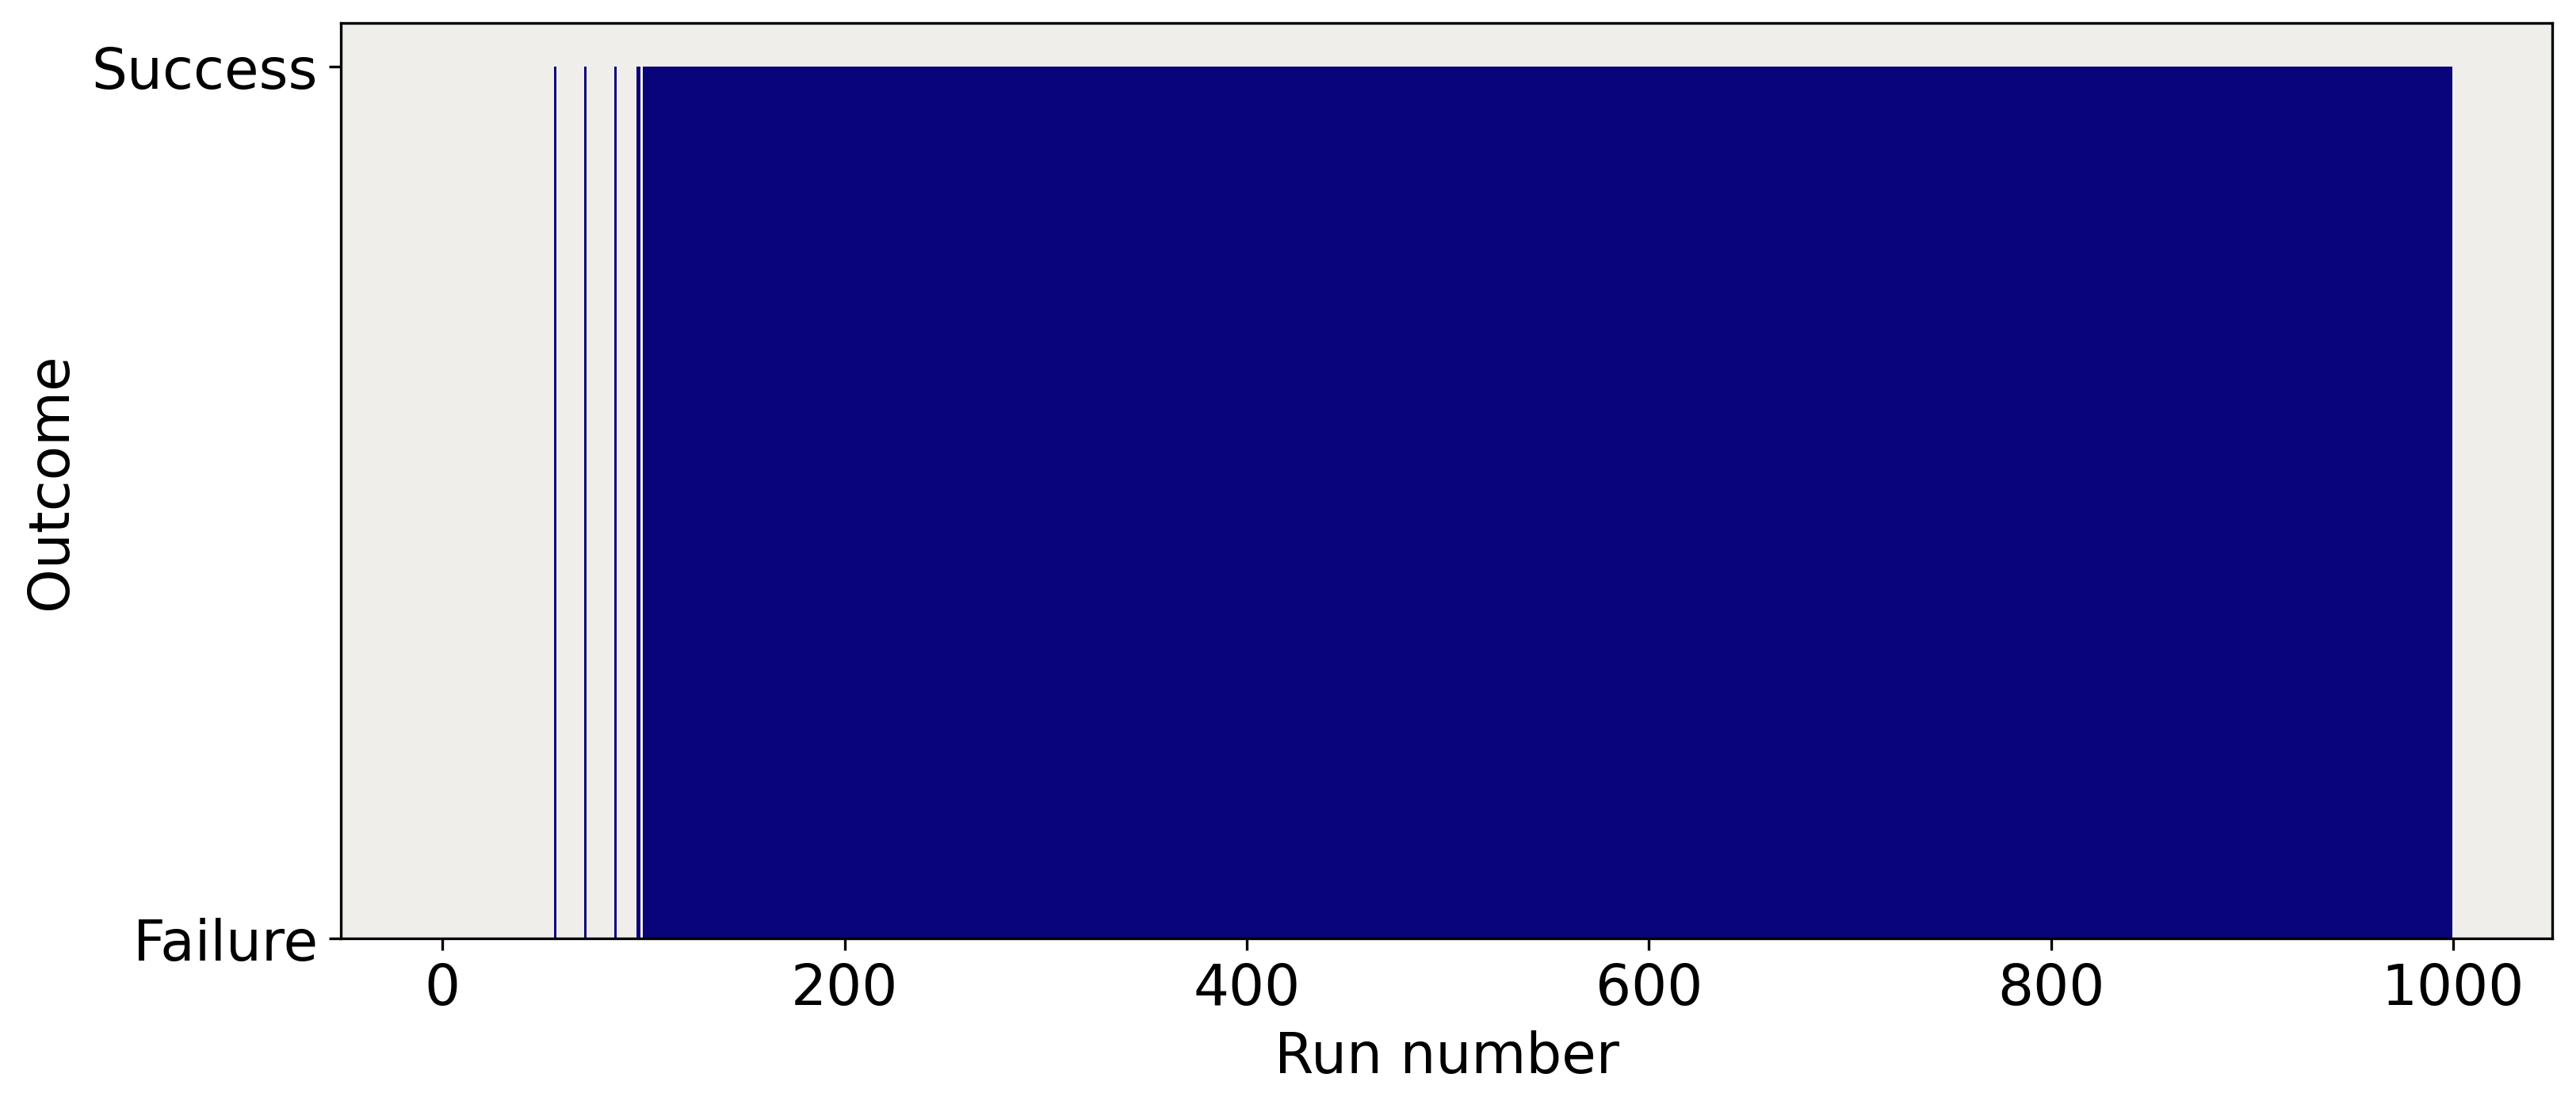

In [87]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

In [14]:
# # Mapping from string to integer and calculating cumulative sum
# binary_outcomes = [1 if outcome == 'Success' else 0 for outcome in outcomes]
# cumulative_outcomes = np.cumsum(binary_outcomes)

# # Plotting
# plt.plot(cumulative_outcomes)
# plt.xlabel('Trial')
# plt.ylabel('Cumulative Successes')
# plt.title('Cumulative Sum of Successes Over Trials')
# plt.grid(True)
# plt.show()

In [15]:
episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    reset_obj = env.reset()
    state = reset_obj[0]
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = env.action_space.sample()
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = env.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


In [23]:
from IPython.display import clear_output
import time 

reset_obj = env.reset()
state = reset_obj[0]
done = False
sequence = []

while not done:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # If there's no best action (only zeros), take a random one
    else:
      action = env.action_space.sample()
    
    # Add the action to the sequence
    sequence.append(action)

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, info, _ = env.step(action)

    # Update our current state
    state = new_state

    # Update the render
    clear_output(wait=True)
    print(env.render())
    time.sleep(1)

print(f"Sequence = {sequence}")

  (Down)
SFFF
FHFH
FFFH
HFFG

Sequence = [3, 0, 0, 1, 1, 1]


## $\epsilon$-greedy algorithm

In [24]:
qtable = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    reset_obj = env.reset()
    state = reset_obj[0]
    done = False

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # EXPLORE: If random number < epsilon, take a random action
        if rnd < epsilon:
          action = env.action_space.sample()
        # EXPLOIT: Else, take the action with the highest value in the current state
        else:
          action = np.argmax(qtable[state])
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = env.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

    # If we have a reward, it means that our outcome is a success
    if reward:
        outcomes.append('Success')
    else:
        outcomes.append('Failure')

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]



Q-table after training:
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.59049   ]
 [0.59049    0.729      0.59049    0.6561    ]
 [0.6561     0.         0.58223173 0.58923356]
 [0.589965   0.6561     0.         0.5314355 ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.6561    ]
 [0.         0.         0.         0.        ]
 [0.65480985 0.         0.729      0.59000282]
 [0.65607823 0.80983497 0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.80430916 0.9        0.71909433]
 [0.81       0.9        1.         0.81      ]
 [0.         0.         0.         0.        ]]


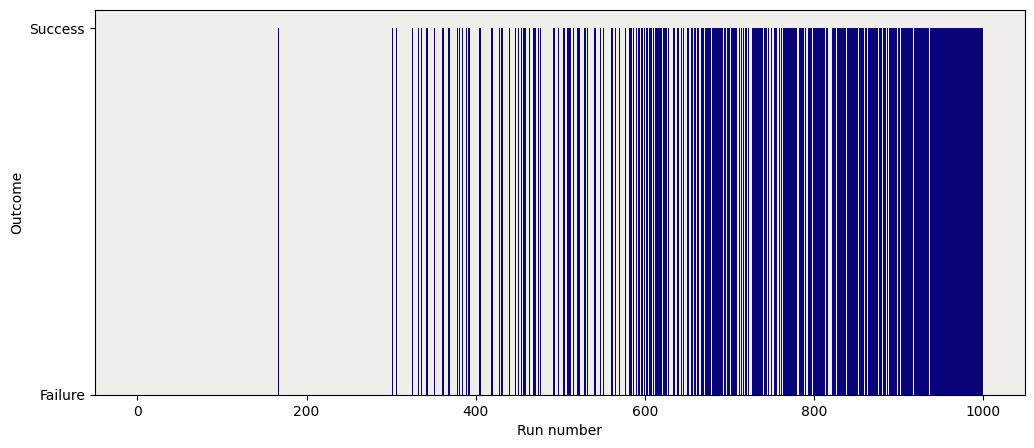

In [17]:
print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

In [25]:
episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    reset_obj = env.reset()
    state = reset_obj[0]
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = env.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


In [26]:
# Graphing epsilon-greedy algo as it learns
# TODO: Plot qtable on each step... - is this fully random until first success? (i.e. 0 qtable until first success)
# TODO: Waiting til first success is slow - why?
qtable = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
episodes = 1000          # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# List of outcomes to plot
# outcomes = []
successes = 0
failures  = 0

# Training
for i in range(episodes):
    reset_obj = env.reset()
    state = reset_obj[0]
    done = False

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # EXPLORE: If random number < epsilon, take a random action
        if rnd < epsilon:
          action = env.action_space.sample()
        # EXPLOIT: Else, take the action with the highest value in the current state
        else:
          action = np.argmax(qtable[state])
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = env.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

        if successes:
          clear_output(wait = True)
          print(f'Iteration {i}')
          print(f'✅ {successes} - ❌ {failures} | {successes/(successes + failures + 1):.0%}\n')
          print(env.render())
          time.sleep(0.35)

    # If we have a reward, it means that our outcome is a success
    if reward:
        successes += 1
        outcome_tmp = 'Success'
    else:
        failures += 1
        outcome_tmp = 'Failure'

    # outcomes.append(outcome_tmp)

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

    if successes:
      print(f'Outcome = {outcome_tmp}; Epsilon = {epsilon}')
      time.sleep(1.5)


Iteration 78
✅ 1 - ❌ 77 | 1%

  (Right)
SFFF
FHFH
FFFH
HFFG



KeyboardInterrupt: 

## Slippery (stochastic) Frozen Lake

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


/Users/darrenwong/Documents/Projects/rl-learning/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):



Q-table after training:
[[0.07865069 0.02154576 0.02143427 0.02140352]
 [0.01504647 0.01205915 0.00692293 0.02233174]
 [0.01858608 0.03171674 0.01666951 0.0210493 ]
 [0.00621796 0.00290863 0.01128234 0.02939555]
 [0.10090619 0.02101861 0.01427377 0.01156204]
 [0.         0.         0.         0.        ]
 [0.01511145 0.00898079 0.02638965 0.00841158]
 [0.         0.         0.         0.        ]
 [0.03931132 0.02562523 0.05108375 0.18118399]
 [0.05298112 0.3355136  0.0731591  0.12181076]
 [0.50507941 0.0454226  0.02568663 0.04666039]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.0154358  0.15494139 0.2735775  0.12426046]
 [0.23366301 0.81986158 0.27655603 0.26301415]
 [0.         0.         0.         0.        ]]


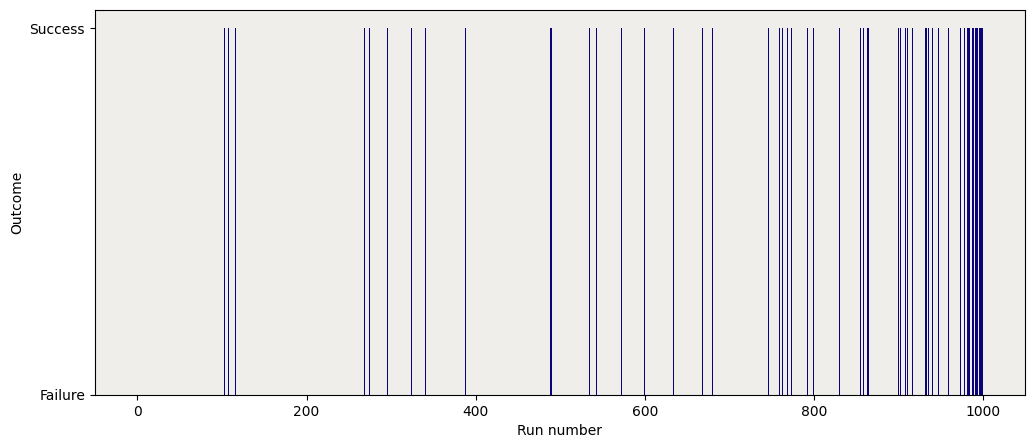

Success rate = 80.0%


In [27]:
env_slip = gym.make("FrozenLake-v1", is_slippery=True)
env_slip.reset()

# We re-initialize the Q-table
qtable = np.zeros((env_slip.observation_space.n, env_slip.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    reset_obj = env_slip.reset()
    state = reset_obj[0]
    done = False
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
          action = env_slip.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
          action = np.argmax(qtable[state])
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = env_slip.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

    # If we have a reward, it means that our outcome is a success
    if reward:
        outcomes.append('Success')
    else:
        outcomes.append('Failure')

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    reset_obj = env_slip.reset()
    state = reset_obj[0]
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = env_slip.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")